<h1 align="center">Iris Flower Classification ML Project<h1>
<h3 align="center">Author - Naman Talwar<h3>

<h3>Import Libraries</h3>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

<h3>Load The Dataset</h3>

In [57]:
data = pd.read_csv("Iris.csv", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
data_header = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)", "Species"]
data.to_csv("Iris.csv", header=data_header, index=False)
data1 = pd.read_csv("Iris.csv")
#for top 5 rows
data1.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Exploratory Data Analysis</h3>
<br>
Number of Rows and Columns in iris dataset

In [59]:
data1.shape

(150, 5)

<br>
Column Headings

In [60]:
data1.columns

Index(['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)',
       'Petal Width (cm)', 'Species'],
      dtype='object')

<br>
Datatypes in Dataset

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (cm)    150 non-null float64
Sepal Width (cm)     150 non-null float64
Petal Length (cm)    150 non-null float64
Petal Width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<br>
Summary of Dataset

In [62]:
data1.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>
Checking Null Values in the Dataset

In [63]:
data1.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64

<br>
Counting the Data Values of Each Column

In [64]:
data1.count()

Sepal Length (cm)    150
Sepal Width (cm)     150
Petal Length (cm)    150
Petal Width (cm)     150
Species              150
dtype: int64

<br>
Grouping

In [65]:
data1.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<br>
Checking for Outliers

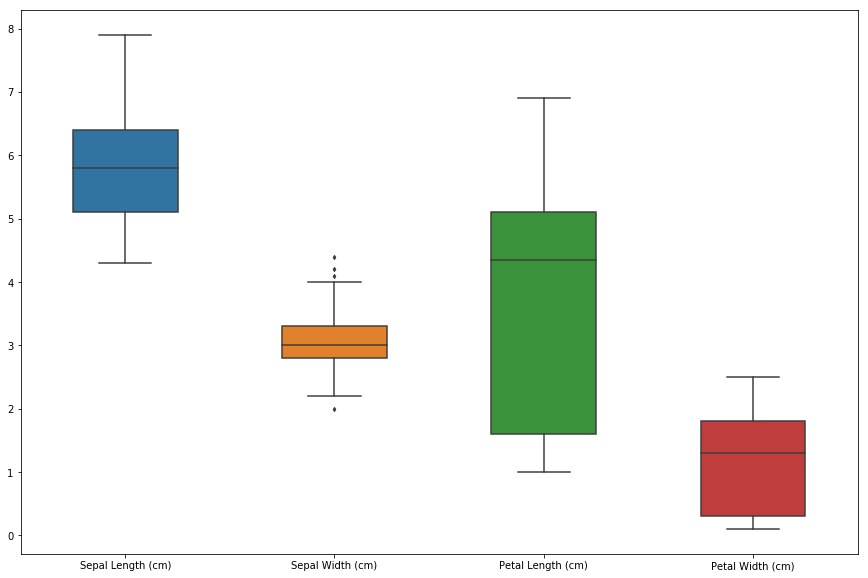

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1,width= 0.5,ax=ax, fliersize=3)

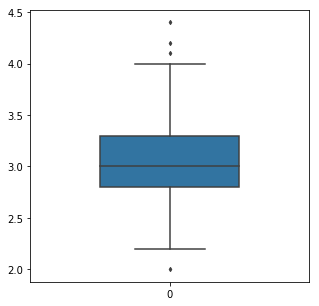

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=data1["Sepal Width (cm)"], width = 0.5, ax=ax, fliersize = 3)

<br>
Some Outliers in the Sepal Width Column 

<br>
<br>
<h3>Plotting</h3>

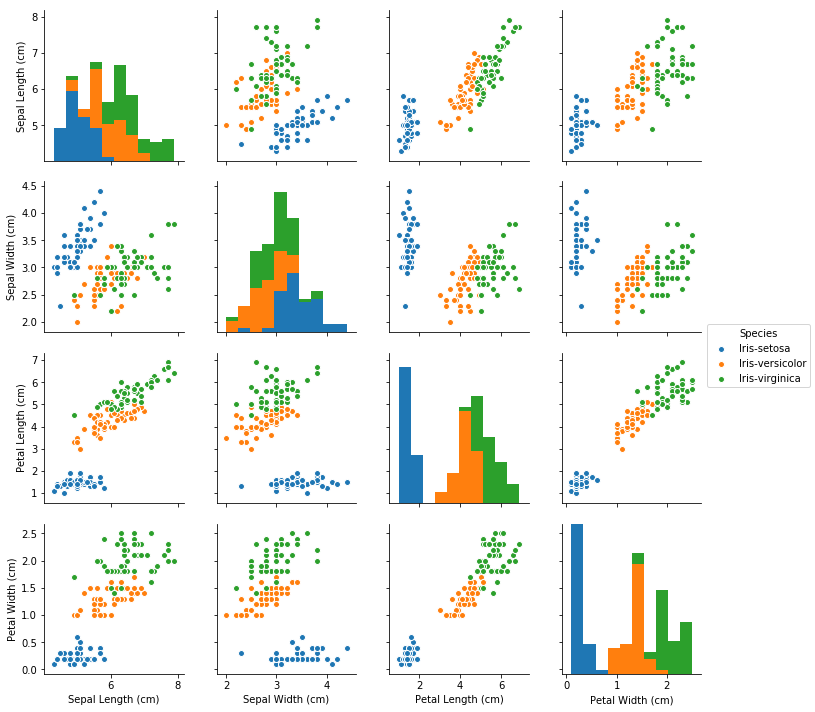

In [111]:
sns.pairplot(data=data1, hue = "Species");

In [72]:
data1.corr()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
Sepal Length (cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal Length (cm),0.871754,-0.420516,1.000000,0.962757
Petal Width (cm),0.817954,-0.356544,0.962757,1.000000


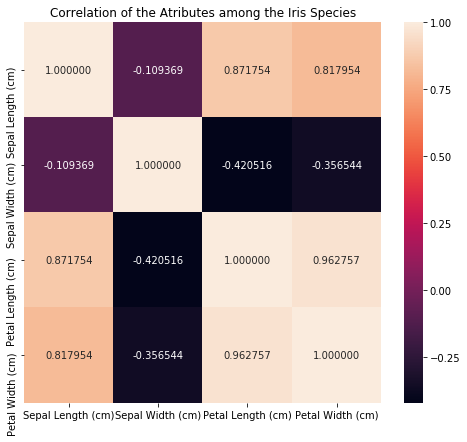

In [88]:
plt.subplots(figsize = (8,7))
sns.heatmap(data1.corr(),annot=True, fmt="f").set_title("Correlation of the Atributes among the Iris Species")
plt.show()

<br>
From the Heatmap, it is observed that the petal length and petal width are highly correlated.

<br>
<br>
<h3>Data Comparision using Barplot

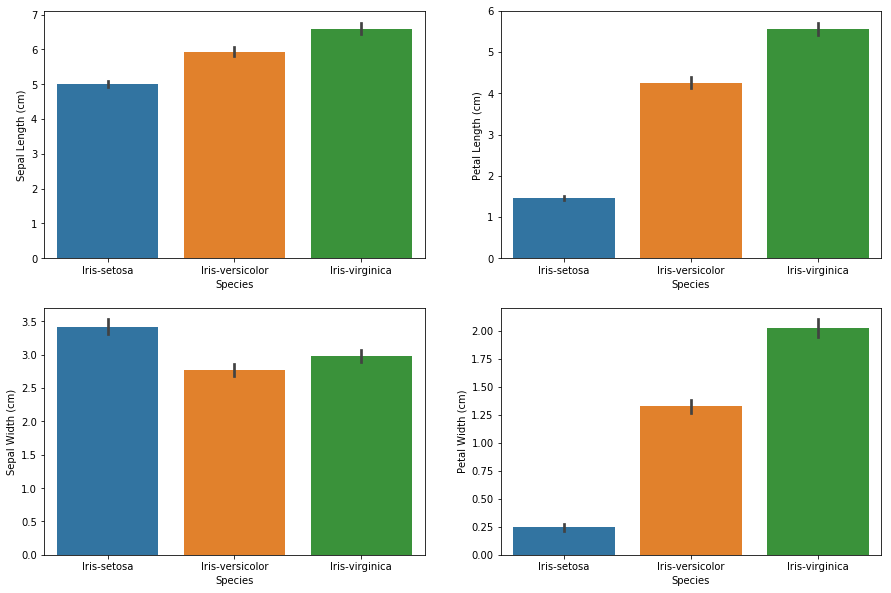

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='Species', y='Sepal Length (cm)',data=data1)
plt.subplot(2,2,2)
sns.barplot(x='Species', y='Petal Length (cm)', data=data1)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='Sepal Width (cm)',data = data1)
plt.subplot(2,2,4)
sns.barplot(x='Species',y="Petal Width (cm)", data=data1)

<br>
<br>
<h3>Scatter plot of Sepal Length and the Sepal Width 

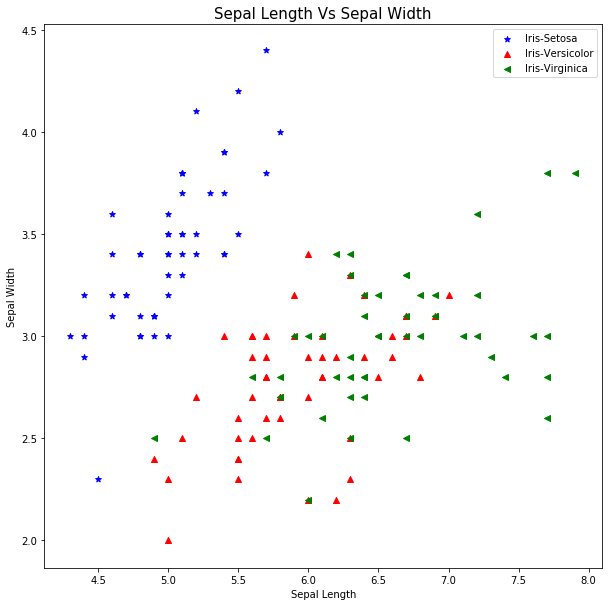

In [92]:
setosa = data1[data1['Species']=='Iris-setosa']
versicolor = data1[data1['Species']=='Iris-versicolor']
virginica = data1[data1['Species']=='Iris-virginica']

plt.figure(figsize =(10,10))
plt.scatter(setosa['Sepal Length (cm)'], setosa['Sepal Width (cm)'], c="blue",label= "Iris-Setosa",marker='*')
plt.scatter(versicolor["Sepal Length (cm)"],versicolor['Sepal Width (cm)'], c="red", label="Iris-Versicolor",marker='^')
plt.scatter(virginica["Sepal Length (cm)"], virginica['Sepal Width (cm)'], c= "green", label='Iris-Virginica', marker='<')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length Vs Sepal Width', fontsize=15)
plt.legend()
plt.show()

<br>
<br>
<h3>Scatter Plot of Petal Length and Petal Width</h3>

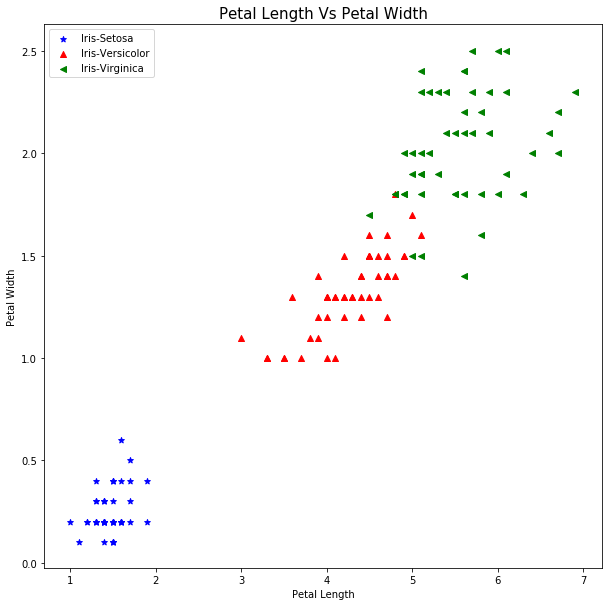

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(setosa['Petal Length (cm)'],setosa['Petal Width (cm)'],c='blue',label='Iris-Setosa',marker='*')
plt.scatter(versicolor['Petal Length (cm)'],versicolor['Petal Width (cm)'], c="red",label = "Iris-Versicolor",marker='^')
plt.scatter(virginica['Petal Length (cm)'],virginica["Petal Width (cm)"], c="green", label= "Iris-Virginica",marker='<')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Petal Length Vs Petal Width",fontsize=15)
plt.legend()
plt.show()

<br>
<br>
<h3>Splitting The Dataset</h3>

In [100]:
x=data1.drop(columns="Species")
y=data1['Species']

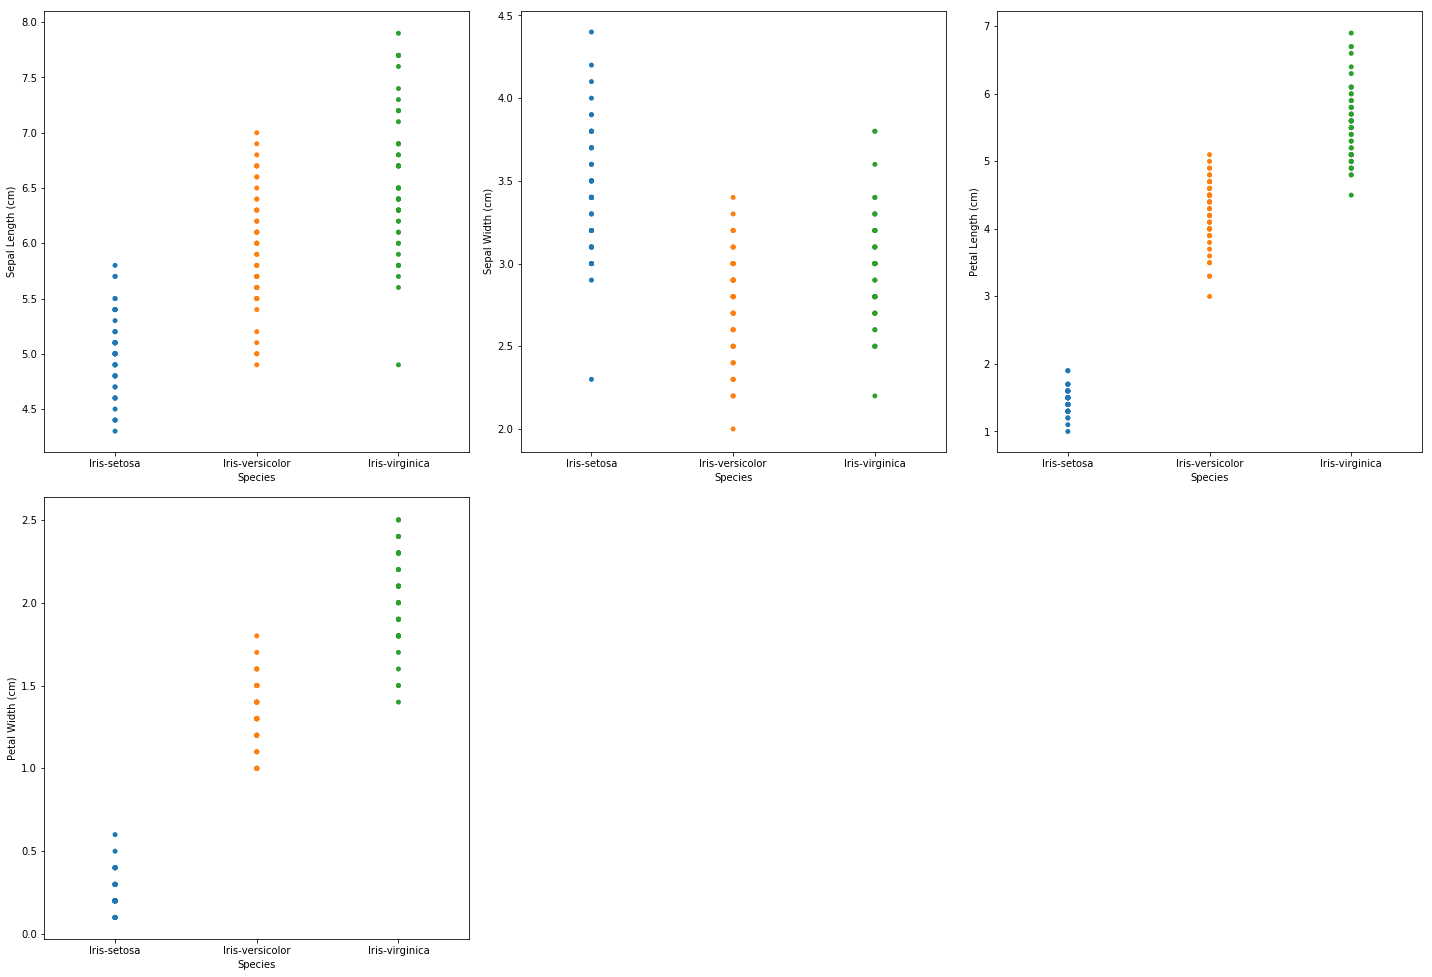

In [109]:
#Let's See How the Data is Distributed for every Column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)    

In [113]:
x_train.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [114]:
x_test.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [115]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [116]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [117]:
print('x_train : ',len(x_train))
print('x_test : ',len(x_test))
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

x_train :  90
x_test :  60
y_train :  90
y_test :  60


<br>
<br>
<h3>Building Models</h3>

<br>
<h3>1. Logistic Regression</h3>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

In [121]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
predict=model.predict(x_test)
print("The Predicted Values on the Test Data",predict)

The Predicted Values on the Test Data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'I

In [123]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

In [127]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy    : ",accuracy_score(y_test,y_test_pred))

Training Accuracy:  0.9555555555555556
Test Accuracy    :  0.9


<br>
<h3>2. KNeighborsClassifier</h3>

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [137]:
y_pred=classifier.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.98        20

    avg / total       0.98      0.98      0.98        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 20]]
Accuracy Score:
 98.33333333333333


<br>
<h3>3. Random Forest Classifier</h3>

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        20

    avg / total       0.97      0.97      0.97        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]
Training Score:
 98.88888888888889


0.9666666666666667

<br>
<h3>4. Decision Tree</h3>

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier=DecisionTreeClassifier(random_state=20)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [151]:
y_pred=classifier.predict(x_test)

In [153]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]


In [154]:
accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy Score:\n",accuracy_score)

Accuracy Score:
 0.9666666666666667


<br>
<h3>Conclusion:</h3>
All The 4 Model Give Similar Accuracies